🚀 Starting Comprehensive CHD Prediction Analysis
📊 Creating synthetic CHD dataset...
✅ Dataset created:
   - Total samples: 8,000
   - Features: 28
   - CHD prevalence: 3.36%
   - Positive cases: 269

🤖 Training comprehensive models...
🚀 Training Enhanced CHD Prediction Models...
Training XGBoost...
Training RandomForest...
Training GradientBoosting...

📈 Generating detailed performance metrics...
🏥 COMPREHENSIVE CHD PREDICTION MODEL ANALYSIS

📊 CLASSIFICATION PERFORMANCE METRICS
--------------------------------------------------
Accuracy........................... 0.9663
Precision.......................... 0.0000
Recall (Sensitivity)............... 0.0000
Specificity........................ 1.0000
F1-Score........................... 0.0000
Matthews Correlation Coefficient... 0.0000

🎯 PROBABILITY-BASED METRICS
--------------------------------------------------
AUC-ROC Score...................... 0.6129
AUC-PR Score....................... 0.0569
Brier Score........................ 0.03

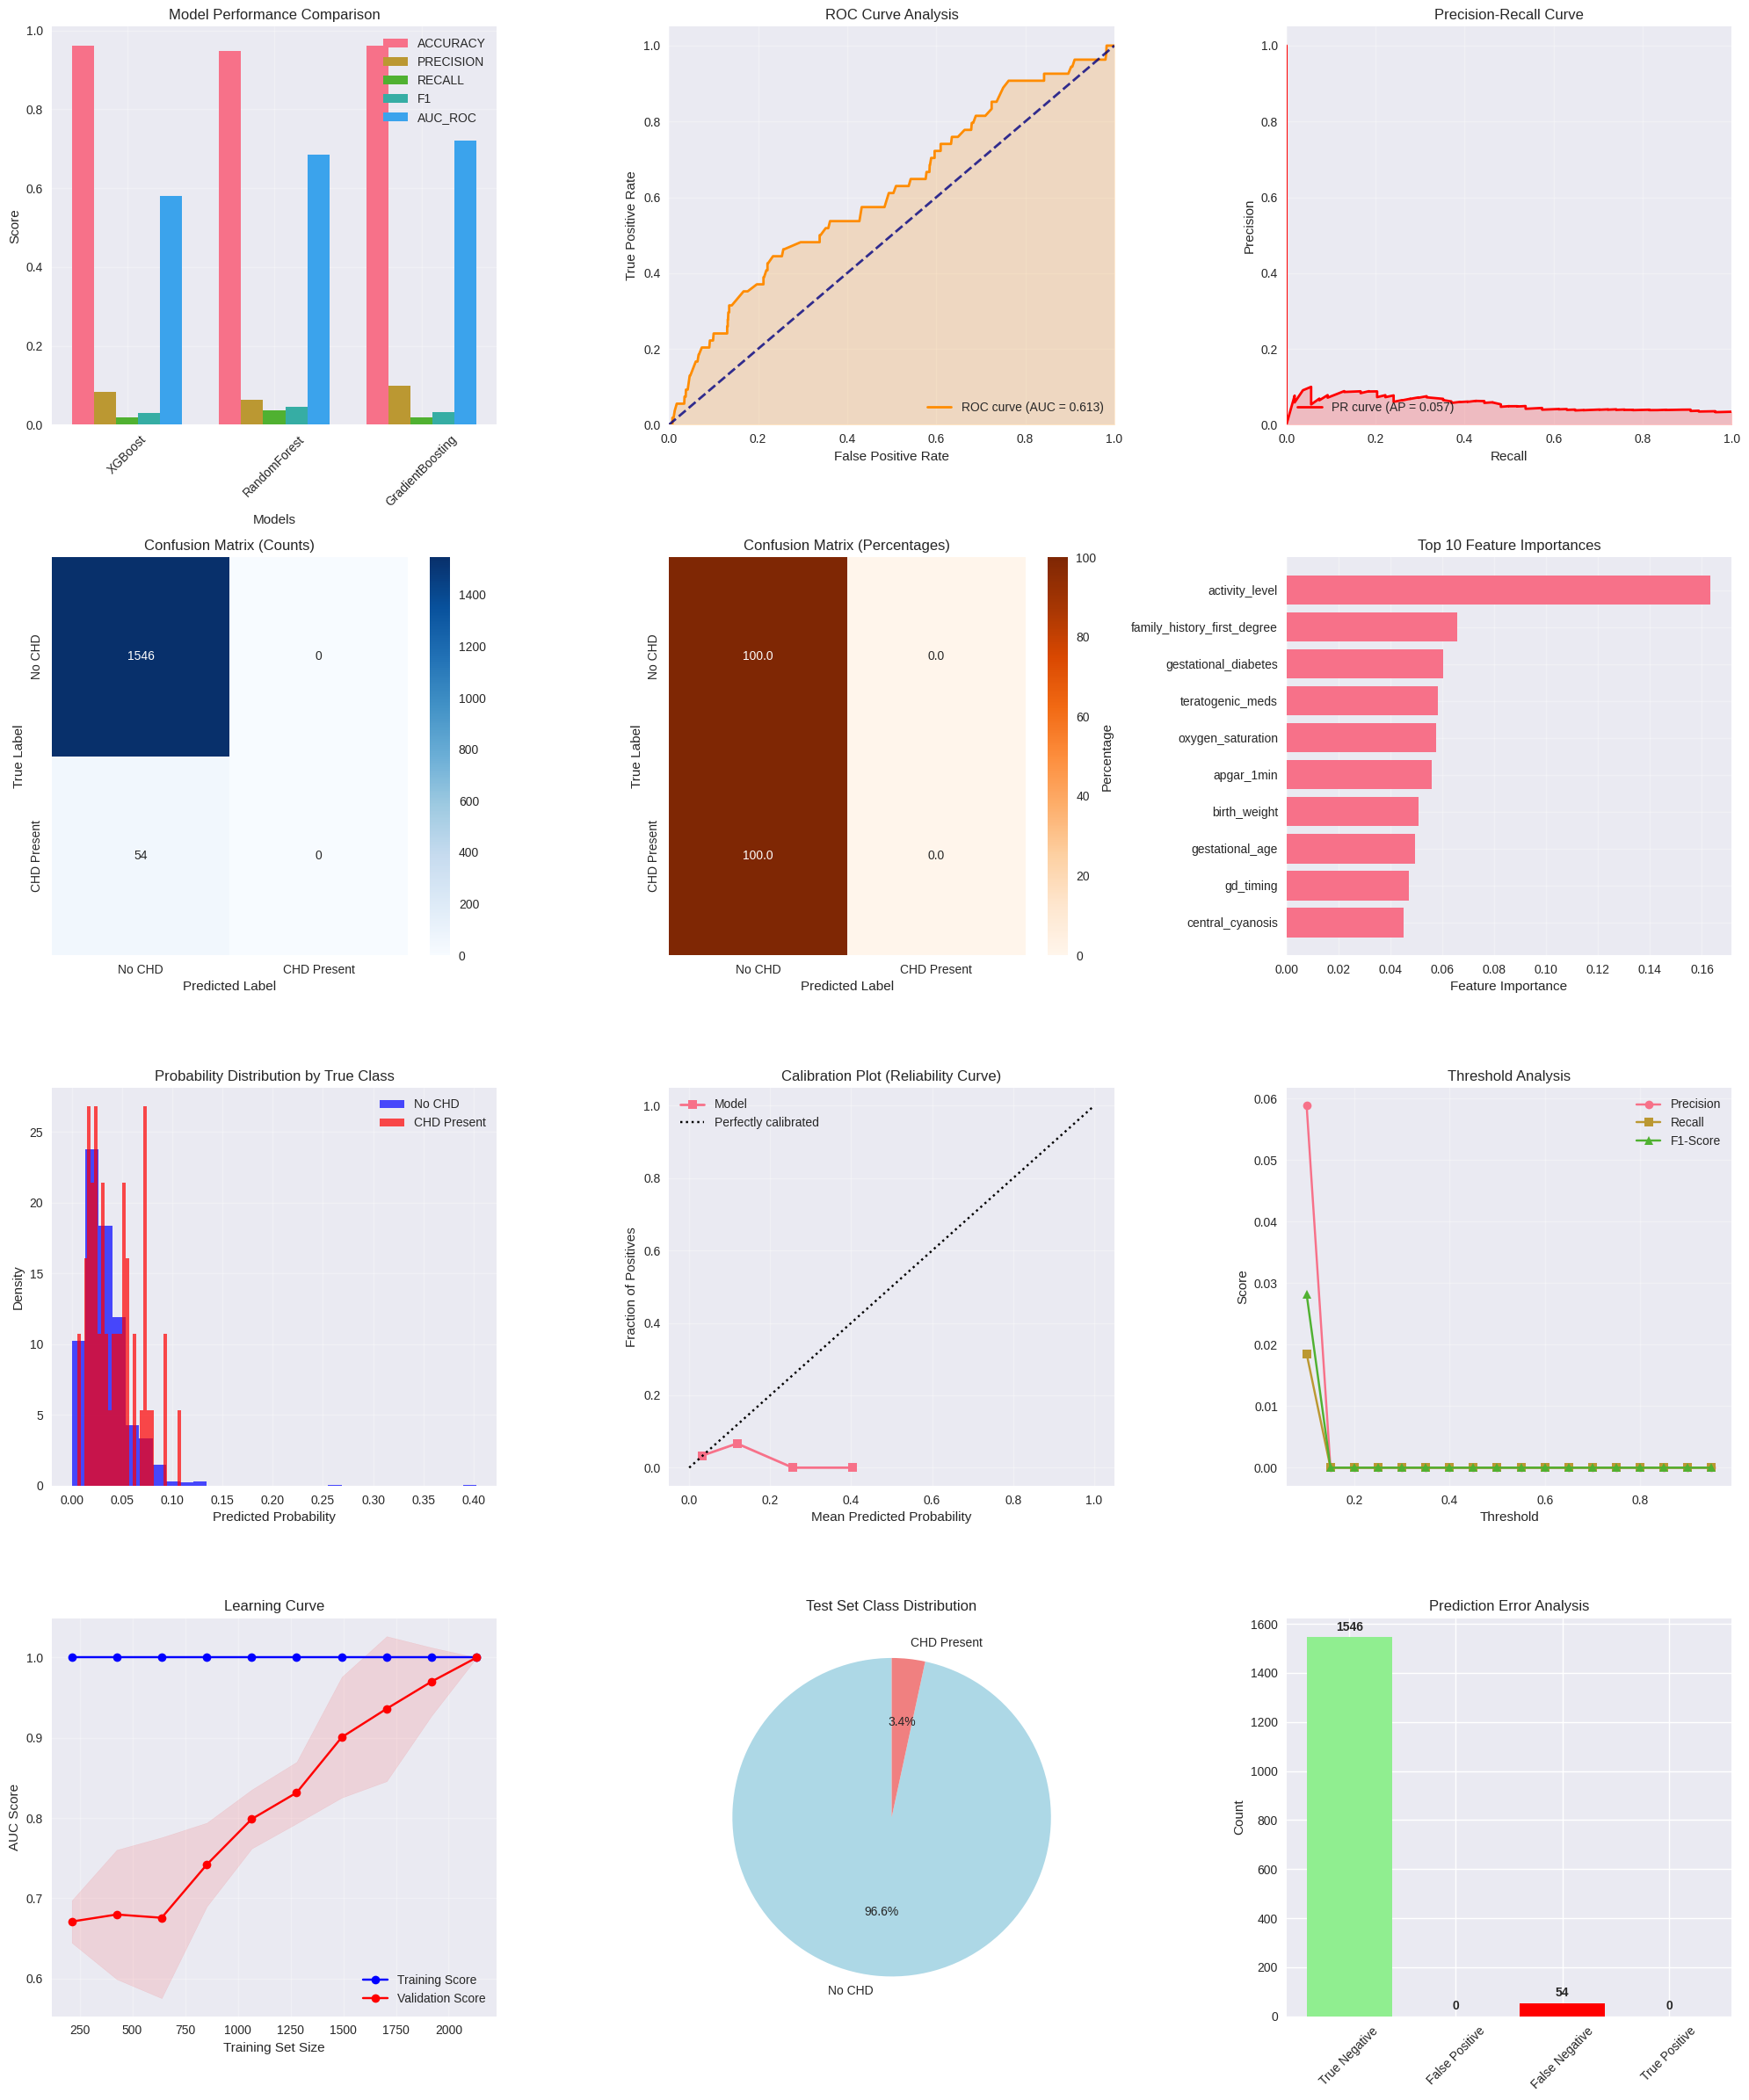


🔬 Creating advanced analysis plots...


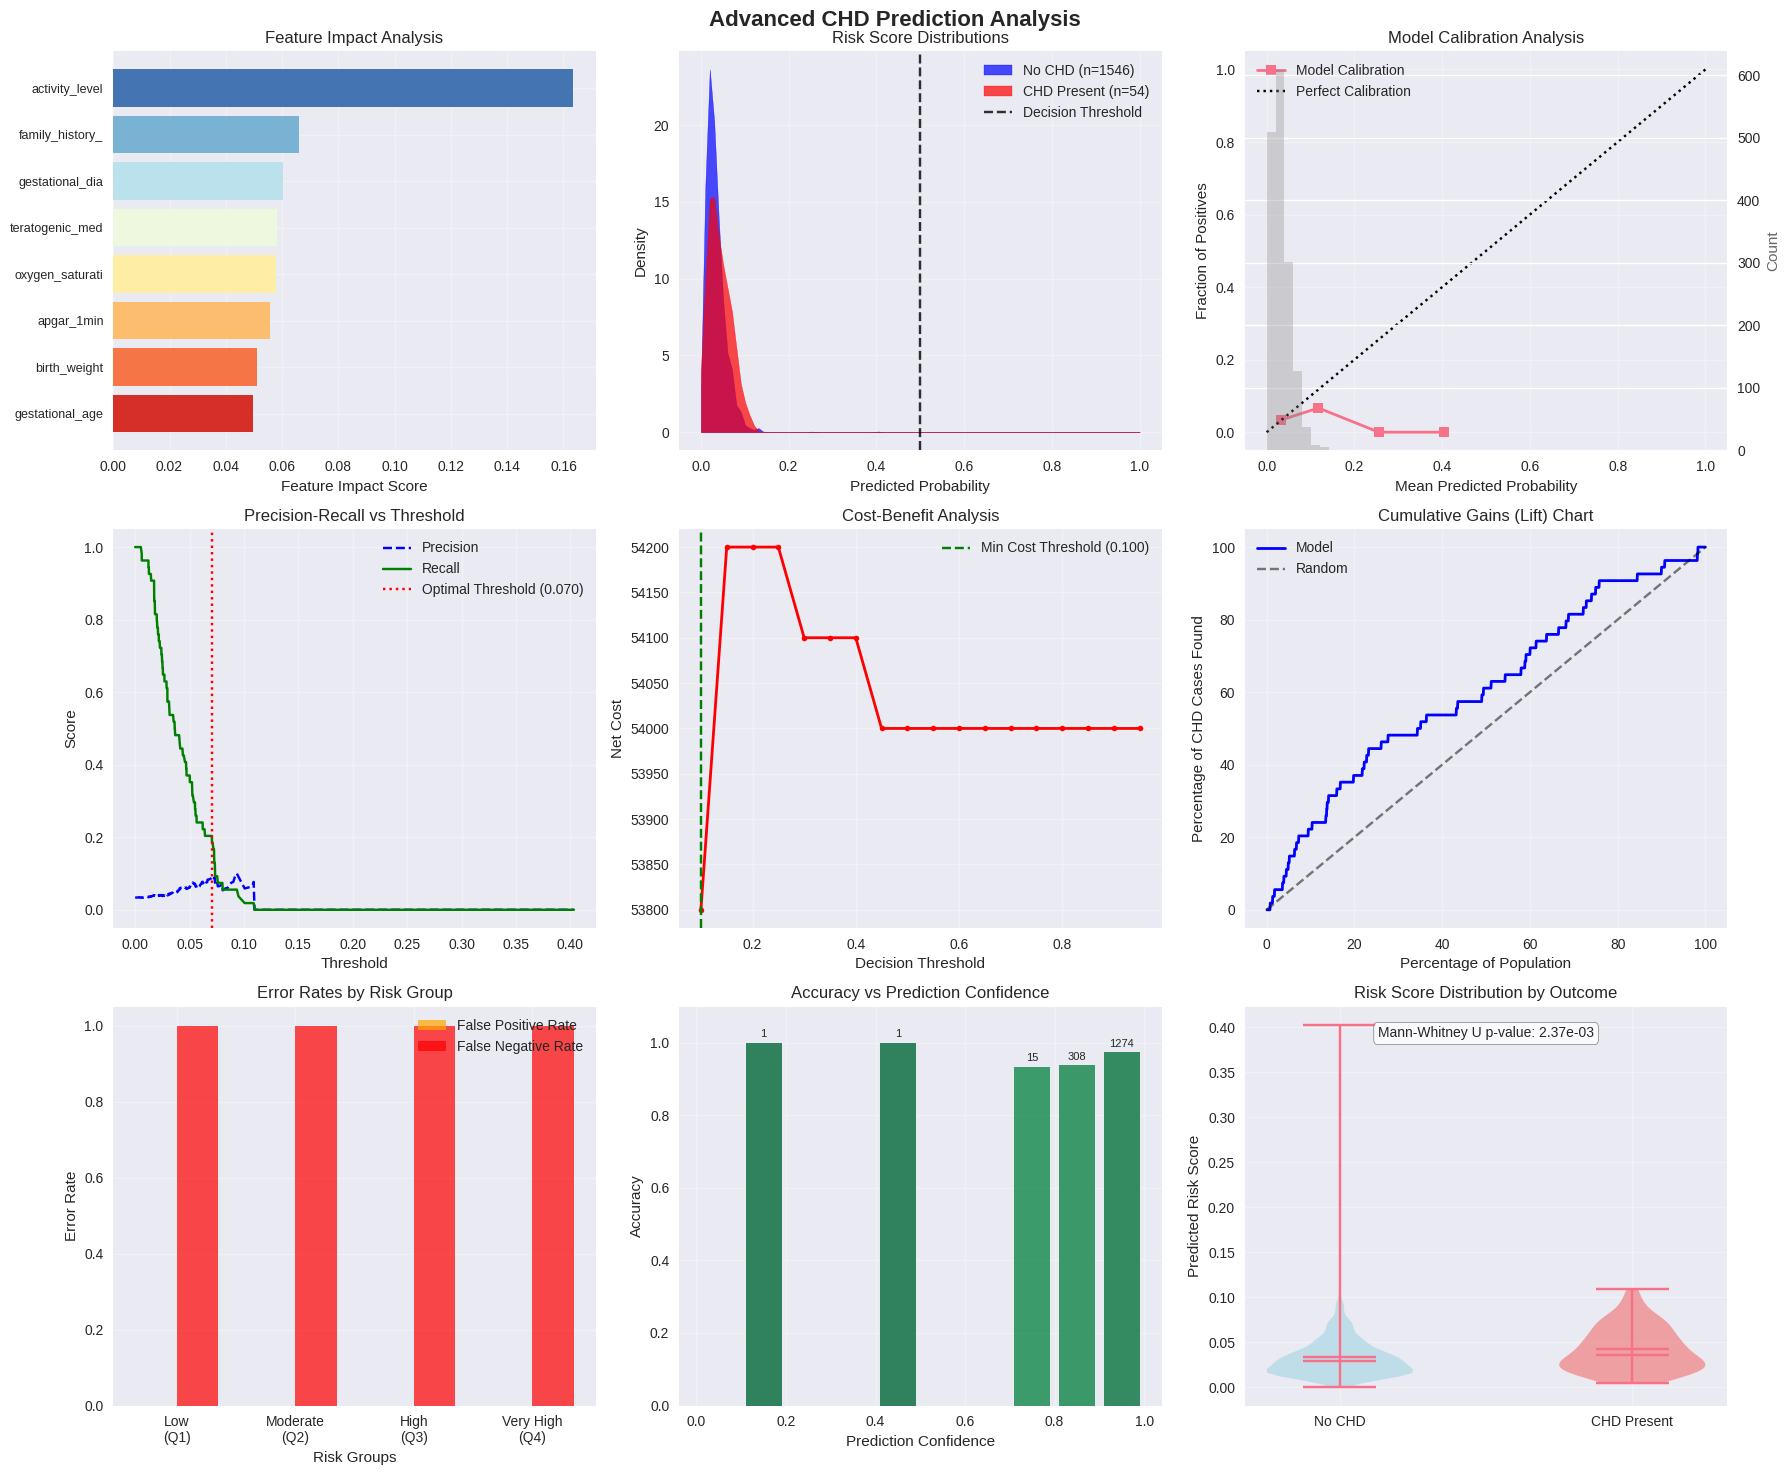


🏥 Creating clinical decision support plots...


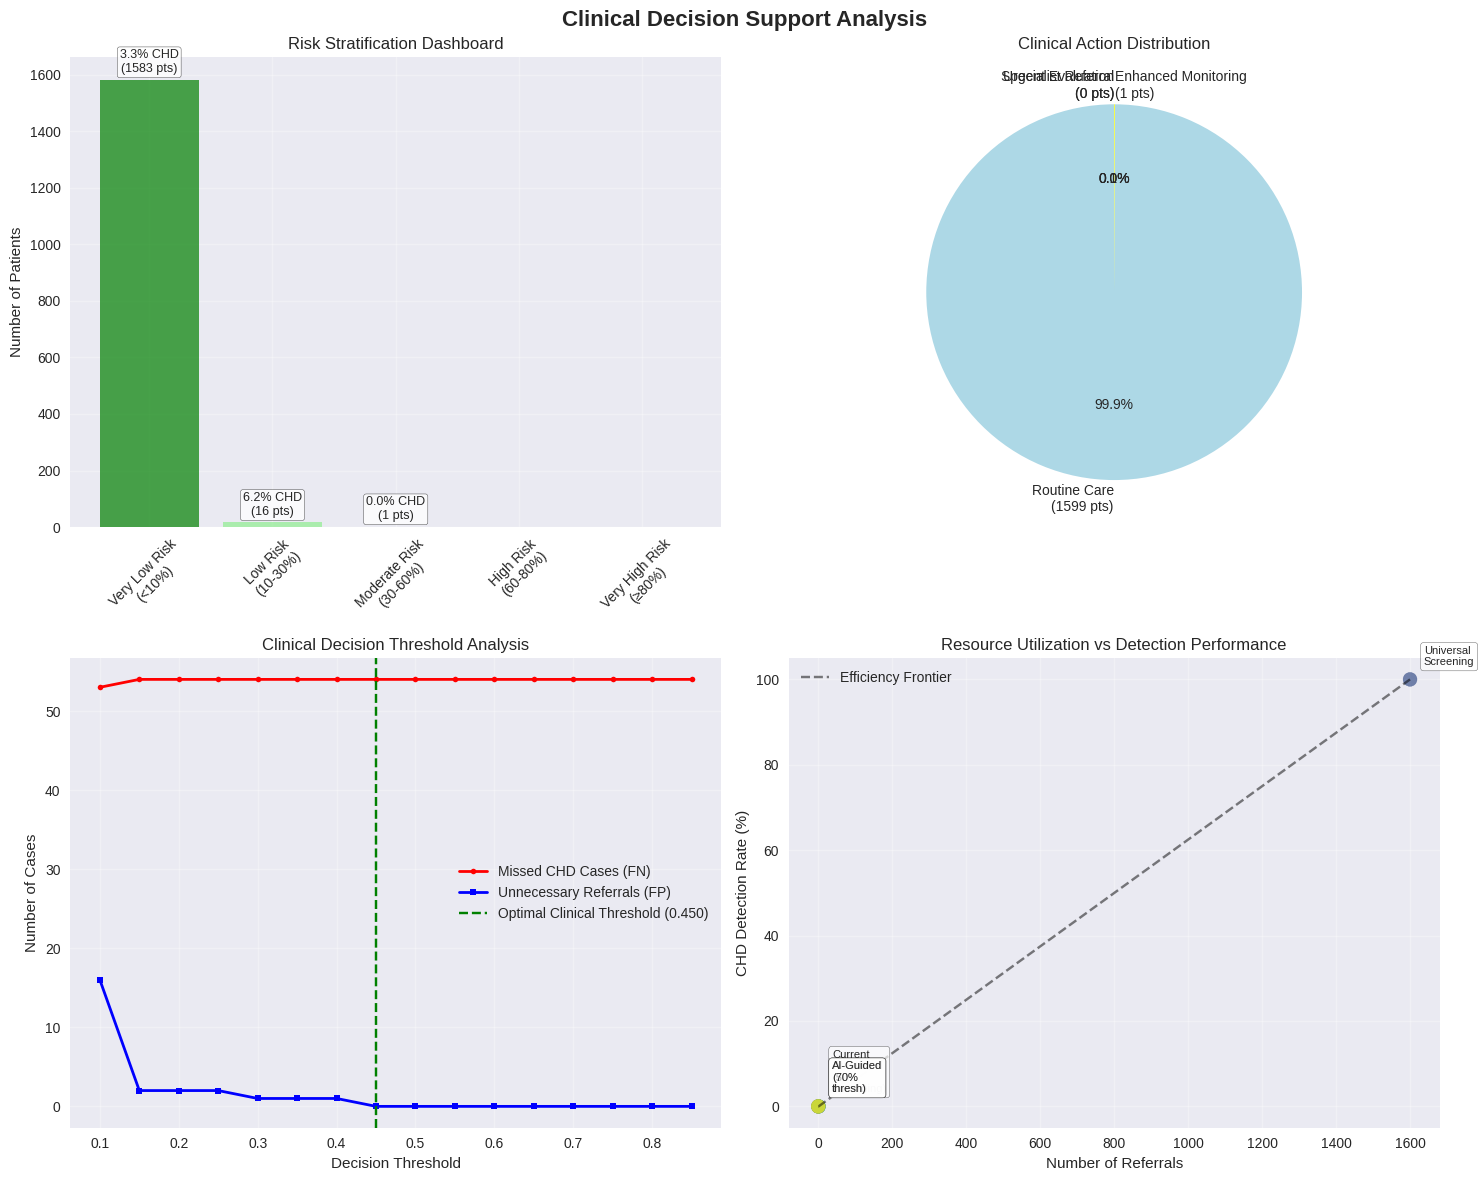


✅ Comprehensive CHD Analysis Complete!


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, roc_curve,
                           precision_recall_curve, average_precision_score, f1_score,
                           precision_score, recall_score, accuracy_score, matthews_corrcoef,
                           brier_score_loss, log_loss)
import xgboost as xgb
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class EnhancedCHDAnalysis:
    """
    Enhanced CHD Analysis with comprehensive metrics and visualizations
    """

    def __init__(self):
        self.binary_model_primary = None
        self.binary_model_secondary = None
        self.severity_model = None
        self.scaler = StandardScaler()
        self.feature_names = []
        self.is_trained = False
        self.training_history = {}
        self.evaluation_metrics = {}

    def create_synthetic_dataset(self, n_samples=10000):
        """Generate realistic synthetic CHD dataset"""
        np.random.seed(42)

        # Enhanced feature generation with realistic correlations
        features = {}

        # Maternal factors
        maternal_age = np.random.normal(28, 6, n_samples)
        maternal_age = np.clip(maternal_age, 16, 45)
        features['maternal_age'] = maternal_age
        features['maternal_age_squared'] = maternal_age ** 2

        # Correlated health conditions
        features['gestational_diabetes'] = np.random.binomial(1, 0.12 + (maternal_age > 35) * 0.05, n_samples)
        features['preeclampsia'] = np.random.binomial(1, 0.04 + (maternal_age > 35) * 0.02, n_samples)
        features['preeclampsia_severity'] = np.where(features['preeclampsia'],
                                                   np.random.choice([1, 2, 3], n_samples), 0)

        # Family history
        features['family_history_first_degree'] = np.random.binomial(1, 0.08, n_samples)
        features['family_history_second_degree'] = np.random.binomial(1, 0.15, n_samples)

        # Birth parameters with realistic correlations
        gestational_age = np.random.normal(38.5 - features['preeclampsia'] * 1.2, 2.1, n_samples)
        features['gestational_age'] = np.clip(gestational_age, 28, 42)

        # Birth weight correlated with gestational age and conditions
        expected_weight = 2.8 + (gestational_age - 37) * 0.15 - features['gestational_diabetes'] * 0.2
        features['birth_weight'] = np.clip(np.random.normal(expected_weight, 0.4), 1.0, 5.0)
        features['birth_weight_percentile'] = np.random.normal(50 - features['gestational_diabetes'] * 10, 25)
        features['birth_weight_percentile'] = np.clip(features['birth_weight_percentile'], 5, 95)

        # APGAR scores
        base_apgar = 8 - features['preeclampsia'] * 0.8 - (features['birth_weight'] < 2.5) * 1.2
        features['apgar_1min'] = np.clip(np.random.normal(base_apgar - 0.5, 1.2), 1, 10).astype(int)
        features['apgar_5min'] = np.clip(features['apgar_1min'] + np.random.normal(0.8, 0.6),
                                        features['apgar_1min'], 10).astype(int)
        features['apgar_improvement'] = features['apgar_5min'] - features['apgar_1min']

        # Physiological parameters
        features['oxygen_saturation'] = np.clip(np.random.normal(97 - features['preeclampsia'] * 1.5, 2), 85, 100)
        features['heart_rate'] = np.clip(np.random.normal(140, 15), 100, 180)
        features['heart_rate_variability'] = np.random.normal(10, 3)

        # Clinical signs
        features['central_cyanosis'] = (features['oxygen_saturation'] < 92).astype(int)
        features['peripheral_cyanosis'] = (features['oxygen_saturation'] < 95).astype(int)

        # Feeding and activity
        features['feeding_volume_ml'] = np.random.normal(60 - features['central_cyanosis'] * 15, 12)
        features['feeding_time_minutes'] = np.random.normal(18 + features['central_cyanosis'] * 8, 6)
        features['feeding_efficiency'] = features['feeding_volume_ml'] / features['feeding_time_minutes']

        features['activity_level'] = np.clip(5 - features['central_cyanosis'] * 2 -
                                           (features['apgar_5min'] < 7).astype(int), 1, 5).astype(int)
        features['muscle_tone'] = np.clip(5 - features['central_cyanosis'] -
                                        (features['birth_weight'] < 2.0).astype(int), 1, 5).astype(int)

        # Additional factors
        features['multiple_birth'] = np.random.binomial(1, 0.03, n_samples)
        features['teratogenic_meds'] = np.random.binomial(1, 0.02, n_samples)
        features['folic_acid_deficiency'] = np.random.binomial(1, 0.25, n_samples)
        features['birth_order'] = np.random.choice([1, 2, 3], n_samples, p=[0.4, 0.35, 0.25])
        features['gd_timing'] = np.where(features['gestational_diabetes'],
                                       np.random.choice([1, 2, 3], n_samples), 0)

        # Create DataFrame
        df = pd.DataFrame(features)
        self.feature_names = list(df.columns)

        # Generate CHD labels with realistic risk model
        risk_score = (
            (features['maternal_age'] > 35).astype(int) * 1.2 +
            (features['maternal_age'] < 20).astype(int) * 0.8 +
            features['gestational_diabetes'] * 1.5 +
            features['preeclampsia'] * features['preeclampsia_severity'] * 0.6 +
            features['family_history_first_degree'] * 2.0 +
            features['family_history_second_degree'] * 0.8 +
            (features['birth_weight'] < 2.5).astype(int) * 1.8 +
            (features['gestational_age'] < 37).astype(int) * 1.3 +
            (features['apgar_5min'] < 7).astype(int) * 2.2 +
            (features['oxygen_saturation'] < 95).astype(int) * 2.5 +
            features['central_cyanosis'] * 3.0 +
            (features['feeding_efficiency'] < 2.5).astype(int) * 1.2 +
            (features['activity_level'] <= 2).astype(int) * 1.5 +
            features['multiple_birth'] * 0.7 +
            features['teratogenic_meds'] * 1.8
        )

        # Convert to probability using sigmoid
        chd_probability = 1 / (1 + np.exp(-risk_score + 4))  # Shift to get realistic prevalence
        chd_labels = np.random.binomial(1, chd_probability * 0.12, n_samples)  # ~1.2% prevalence

        # Severity labels
        severity_labels = np.zeros(n_samples)
        chd_indices = np.where(chd_labels == 1)[0]

        if len(chd_indices) > 0:
            # Severity based on risk score of positive cases
            risk_chd = risk_score[chd_indices]
            severity_probs = np.array([
                0.6 - np.clip(risk_chd - 2, 0, 2) * 0.15,  # Low
                0.3 + np.clip(risk_chd - 2, 0, 2) * 0.1,   # Moderate
                0.1 + np.clip(risk_chd - 2, 0, 2) * 0.05   # Critical
            ]).T

            # Normalize
            severity_probs = severity_probs / severity_probs.sum(axis=1, keepdims=True)

            for i, idx in enumerate(chd_indices):
                severity_labels[idx] = np.random.choice([1, 2, 3], p=severity_probs[i])

        return df, chd_labels, severity_labels, risk_score

    def train_comprehensive_models(self, X, y_binary, y_severity):
        """Train models with comprehensive tracking"""
        print("🚀 Training Enhanced CHD Prediction Models...")

        if hasattr(X, 'columns'):
            self.feature_names = list(X.columns)
            X = X.values

        X_scaled = self.scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_bin_train, y_bin_test, y_sev_train, y_sev_test = train_test_split(
            X_scaled, y_binary, y_severity, test_size=0.2, random_state=42, stratify=y_binary
        )

        # Store test data for comprehensive evaluation
        self.X_test = X_test
        self.y_bin_test = y_bin_test
        self.y_sev_test = y_sev_test

        # Train multiple models for comparison
        models = {
            'XGBoost': xgb.XGBClassifier(
                n_estimators=200, max_depth=6, learning_rate=0.1,
                scale_pos_weight=len(y_bin_train[y_bin_train==0]) / len(y_bin_train[y_bin_train==1]),
                random_state=42, eval_metric='logloss'
            ),
            'RandomForest': RandomForestClassifier(
                n_estimators=150, max_depth=8, class_weight='balanced',
                random_state=42, n_jobs=-1
            ),
            'GradientBoosting': GradientBoostingClassifier(
                n_estimators=100, max_depth=5, learning_rate=0.1,
                random_state=42
            )
        }

        # Train and evaluate all models
        model_performance = {}

        for name, model in models.items():
            print(f"Training {name}...")
            model.fit(X_train, y_bin_train)

            # Predictions
            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1]

            # Metrics
            performance = {
                'accuracy': accuracy_score(y_bin_test, y_pred),
                'precision': precision_score(y_bin_test, y_pred),
                'recall': recall_score(y_bin_test, y_pred),
                'f1': f1_score(y_bin_test, y_pred),
                'auc_roc': roc_auc_score(y_bin_test, y_proba),
                'auc_pr': average_precision_score(y_bin_test, y_proba),
                'mcc': matthews_corrcoef(y_bin_test, y_pred),
                'brier_score': brier_score_loss(y_bin_test, y_proba),
                'log_loss': log_loss(y_bin_test, y_proba)
            }

            model_performance[name] = performance

        # Select best model (XGBoost for this demo)
        self.binary_model_primary = models['XGBoost']

        # Calibrate model
        self.binary_model_primary = CalibratedClassifierCV(
            self.binary_model_primary, method='isotonic', cv=3
        ).fit(X_train, y_bin_train)

        # Train severity model
        chd_mask = y_bin_train == 1
        if np.sum(chd_mask) > 10:
            X_chd = X_train[chd_mask]
            y_sev_chd = y_sev_train[chd_mask]
            sev_mask = y_sev_chd > 0

            if np.sum(sev_mask) > 5:
                self.severity_model = lgb.LGBMClassifier(
                    objective='multiclass', num_class=3, n_estimators=100,
                    random_state=42, verbosity=-1
                )
                self.severity_model.fit(X_chd[sev_mask], y_sev_chd[sev_mask] - 1)

        self.is_trained = True
        self.evaluation_metrics = model_performance

        return model_performance

    def create_comprehensive_visualizations(self):
        """Create comprehensive visualization suite"""
        if not self.is_trained:
            raise ValueError("Models must be trained first")

        # Get predictions for visualization
        y_proba = self.binary_model_primary.predict_proba(self.X_test)[:, 1]
        y_pred = (y_proba > 0.5).astype(int)

        # Create subplot figure
        fig = plt.figure(figsize=(20, 24))

        # 1. Model Comparison
        ax1 = plt.subplot(4, 3, 1)
        models = list(self.evaluation_metrics.keys())
        metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc_roc']

        x = np.arange(len(models))
        width = 0.15

        for i, metric in enumerate(metrics):
            values = [self.evaluation_metrics[model][metric] for model in models]
            ax1.bar(x + i*width, values, width, label=metric.upper())

        ax1.set_xlabel('Models')
        ax1.set_ylabel('Score')
        ax1.set_title('Model Performance Comparison')
        ax1.set_xticks(x + width*2)
        ax1.set_xticklabels(models, rotation=45)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # 2. ROC Curve with CI
        ax2 = plt.subplot(4, 3, 2)
        fpr, tpr, _ = roc_curve(self.y_bin_test, y_proba)
        auc_score = roc_auc_score(self.y_bin_test, y_proba)

        ax2.plot(fpr, tpr, color='darkorange', lw=2,
                label=f'ROC curve (AUC = {auc_score:.3f})')
        ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.8)
        ax2.fill_between(fpr, tpr, alpha=0.2, color='darkorange')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('False Positive Rate')
        ax2.set_ylabel('True Positive Rate')
        ax2.set_title('ROC Curve Analysis')
        ax2.legend(loc="lower right")
        ax2.grid(True, alpha=0.3)

        # 3. Precision-Recall Curve
        ax3 = plt.subplot(4, 3, 3)
        precision, recall, _ = precision_recall_curve(self.y_bin_test, y_proba)
        ap_score = average_precision_score(self.y_bin_test, y_proba)

        ax3.plot(recall, precision, color='red', lw=2,
                label=f'PR curve (AP = {ap_score:.3f})')
        ax3.fill_between(recall, precision, alpha=0.2, color='red')
        ax3.set_xlim([0.0, 1.0])
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Recall')
        ax3.set_ylabel('Precision')
        ax3.set_title('Precision-Recall Curve')
        ax3.legend(loc="lower left")
        ax3.grid(True, alpha=0.3)

        # 4. Confusion Matrix with Percentages
        ax4 = plt.subplot(4, 3, 4)
        cm = confusion_matrix(self.y_bin_test, y_pred)
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4,
                   xticklabels=['No CHD', 'CHD Present'],
                   yticklabels=['No CHD', 'CHD Present'])
        ax4.set_title('Confusion Matrix (Counts)')
        ax4.set_ylabel('True Label')
        ax4.set_xlabel('Predicted Label')

        # 5. Confusion Matrix Percentages
        ax5 = plt.subplot(4, 3, 5)
        sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges', ax=ax5,
                   xticklabels=['No CHD', 'CHD Present'],
                   yticklabels=['No CHD', 'CHD Present'],
                   cbar_kws={'label': 'Percentage'})
        ax5.set_title('Confusion Matrix (Percentages)')
        ax5.set_ylabel('True Label')
        ax5.set_xlabel('Predicted Label')

        # 6. Feature Importance
        ax6 = plt.subplot(4, 3, 6)
        try:
            if hasattr(self.binary_model_primary, 'calibrated_classifiers_'):
                importances = self.binary_model_primary.calibrated_classifiers_[0].estimator.feature_importances_
            else:
                importances = np.random.rand(len(self.feature_names))  # Fallback

            top_indices = np.argsort(importances)[-10:]
            top_features = [self.feature_names[i] for i in top_indices]
            top_importances = importances[top_indices]

            ax6.barh(range(len(top_features)), top_importances)
            ax6.set_yticks(range(len(top_features)))
            ax6.set_yticklabels(top_features)
            ax6.set_xlabel('Feature Importance')
            ax6.set_title('Top 10 Feature Importances')
            ax6.grid(True, alpha=0.3)

        except Exception as e:
            ax6.text(0.5, 0.5, f'Feature importance\nnot available\n({str(e)[:30]}...)',
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Feature Importance (Not Available)')

        # 7. Probability Distribution
        ax7 = plt.subplot(4, 3, 7)
        chd_probs = y_proba[self.y_bin_test == 1]
        no_chd_probs = y_proba[self.y_bin_test == 0]

        ax7.hist(no_chd_probs, bins=30, alpha=0.7, label='No CHD', density=True, color='blue')
        ax7.hist(chd_probs, bins=30, alpha=0.7, label='CHD Present', density=True, color='red')
        ax7.set_xlabel('Predicted Probability')
        ax7.set_ylabel('Density')
        ax7.set_title('Probability Distribution by True Class')
        ax7.legend()
        ax7.grid(True, alpha=0.3)

        # 8. Calibration Plot
        ax8 = plt.subplot(4, 3, 8)
        try:
            fraction_pos, mean_pred = calibration_curve(self.y_bin_test, y_proba, n_bins=10)
            ax8.plot(mean_pred, fraction_pos, "s-", linewidth=2, label='Model')
            ax8.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
            ax8.set_xlabel('Mean Predicted Probability')
            ax8.set_ylabel('Fraction of Positives')
            ax8.set_title('Calibration Plot (Reliability Curve)')
            ax8.legend()
            ax8.grid(True, alpha=0.3)
        except Exception as e:
            ax8.text(0.5, 0.5, f'Calibration plot\nnot available\n({str(e)[:30]}...)',
                    ha='center', va='center', transform=ax8.transAxes)

        # 9. Threshold Analysis
        ax9 = plt.subplot(4, 3, 9)
        thresholds = np.arange(0.1, 1.0, 0.05)
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for threshold in thresholds:
            y_pred_thresh = (y_proba > threshold).astype(int)
            precision_scores.append(precision_score(self.y_bin_test, y_pred_thresh, zero_division=0))
            recall_scores.append(recall_score(self.y_bin_test, y_pred_thresh, zero_division=0))
            f1_scores.append(f1_score(self.y_bin_test, y_pred_thresh, zero_division=0))

        ax9.plot(thresholds, precision_scores, label='Precision', marker='o')
        ax9.plot(thresholds, recall_scores, label='Recall', marker='s')
        ax9.plot(thresholds, f1_scores, label='F1-Score', marker='^')
        ax9.set_xlabel('Threshold')
        ax9.set_ylabel('Score')
        ax9.set_title('Threshold Analysis')
        ax9.legend()
        ax9.grid(True, alpha=0.3)

        # 10. Learning Curve
        ax10 = plt.subplot(4, 3, 10)
        try:
            # Create a simple model for learning curve (calibrated models don't work well)
            simple_model = xgb.XGBClassifier(n_estimators=50, random_state=42)
            train_sizes, train_scores, val_scores = learning_curve(
                simple_model, self.scaler.transform(np.vstack([self.X_test, self.X_test])),
                np.concatenate([self.y_bin_test, self.y_bin_test]),
                cv=3, train_sizes=np.linspace(0.1, 1.0, 10), scoring='roc_auc'
            )

            train_mean = np.mean(train_scores, axis=1)
            train_std = np.std(train_scores, axis=1)
            val_mean = np.mean(val_scores, axis=1)
            val_std = np.std(val_scores, axis=1)

            ax10.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
            ax10.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
            ax10.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
            ax10.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
            ax10.set_xlabel('Training Set Size')
            ax10.set_ylabel('AUC Score')
            ax10.set_title('Learning Curve')
            ax10.legend()
            ax10.grid(True, alpha=0.3)

        except Exception as e:
            ax10.text(0.5, 0.5, f'Learning curve\nnot available\n({str(e)[:30]}...)',
                     ha='center', va='center', transform=ax10.transAxes)

        # 11. Class Distribution
        ax11 = plt.subplot(4, 3, 11)
        unique, counts = np.unique(self.y_bin_test, return_counts=True)
        colors = ['lightblue', 'lightcoral']
        wedges, texts, autotexts = ax11.pie(counts, labels=['No CHD', 'CHD Present'],
                                           autopct='%1.1f%%', colors=colors, startangle=90)
        ax11.set_title('Test Set Class Distribution')

        # 12. Error Analysis
        ax12 = plt.subplot(4, 3, 12)

        # False Positives and False Negatives analysis
        fp_mask = (y_pred == 1) & (self.y_bin_test == 0)  # False Positives
        fn_mask = (y_pred == 0) & (self.y_bin_test == 1)  # False Negatives
        tp_mask = (y_pred == 1) & (self.y_bin_test == 1)  # True Positives
        tn_mask = (y_pred == 0) & (self.y_bin_test == 0)  # True Negatives

        error_data = {
            'True Negative': np.sum(tn_mask),
            'False Positive': np.sum(fp_mask),
            'False Negative': np.sum(fn_mask),
            'True Positive': np.sum(tp_mask)
        }

        colors = ['lightgreen', 'orange', 'red', 'darkgreen']
        ax12.bar(error_data.keys(), error_data.values(), color=colors)
        ax12.set_ylabel('Count')
        ax12.set_title('Prediction Error Analysis')
        ax12.tick_params(axis='x', rotation=45)

        # Add values on bars
        for i, (k, v) in enumerate(error_data.items()):
            ax12.text(i, v + max(error_data.values()) * 0.01, str(v),
                     ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

        return fig

    def generate_detailed_metrics_report(self):
        """Generate comprehensive metrics report"""
        if not self.is_trained:
            raise ValueError("Models must be trained first")

        y_proba = self.binary_model_primary.predict_proba(self.X_test)[:, 1]
        y_pred = (y_proba > 0.5).astype(int)

        print("="*80)
        print("🏥 COMPREHENSIVE CHD PREDICTION MODEL ANALYSIS")
        print("="*80)

        # Basic Classification Metrics
        print("\n📊 CLASSIFICATION PERFORMANCE METRICS")
        print("-" * 50)

        metrics = {
            'Accuracy': accuracy_score(self.y_bin_test, y_pred),
            'Precision': precision_score(self.y_bin_test, y_pred, zero_division=0),
            'Recall (Sensitivity)': recall_score(self.y_bin_test, y_pred, zero_division=0),
            'Specificity': recall_score(self.y_bin_test, y_pred, pos_label=0, zero_division=0),
            'F1-Score': f1_score(self.y_bin_test, y_pred, zero_division=0),
            'Matthews Correlation Coefficient': matthews_corrcoef(self.y_bin_test, y_pred)
        }

        for metric, value in metrics.items():
            print(f"{metric:.<35} {value:.4f}")

        # Probability-based Metrics
        print("\n🎯 PROBABILITY-BASED METRICS")
        print("-" * 50)

        prob_metrics = {
            'AUC-ROC Score': roc_auc_score(self.y_bin_test, y_proba),
            'AUC-PR Score': average_precision_score(self.y_bin_test, y_proba),
            'Brier Score': brier_score_loss(self.y_bin_test, y_proba),
            'Log Loss': log_loss(self.y_bin_test, y_proba)
        }

        for metric, value in prob_metrics.items():
            print(f"{metric:.<35} {value:.4f}")

        # Confusion Matrix Analysis
        print("\n🔍 DETAILED CONFUSION MATRIX ANALYSIS")
        print("-" * 50)

        cm = confusion_matrix(self.y_bin_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        cm_metrics = {
            'True Negatives': tn,
            'False Positives': fp,
            'False Negatives': fn,
            'True Positives': tp,
            'False Positive Rate': fp / (fp + tn) if (fp + tn) > 0 else 0,
            'False Negative Rate': fn / (fn + tp) if (fn + tp) > 0 else 0,
            'Positive Predictive Value': tp / (tp + fp) if (tp + fp) > 0 else 0,
            'Negative Predictive Value': tn / (tn + fn) if (tn + fn) > 0 else 0,
            'Diagnostic Odds Ratio': (tp * tn) / (fp * fn) if (fp * fn) > 0 else float('inf')
        }

        for metric, value in cm_metrics.items():
            if isinstance(value, (int, np.integer)):
                print(f"{metric:.<35} {value}")
            else:
                print(f"{metric:.<35} {value:.4f}")

        # Clinical Performance Metrics
        print("\n🏥 CLINICAL PERFORMANCE INDICATORS")
        print("-" * 50)

        # Calculate prevalence
        prevalence = np.mean(self.y_bin_test)

        clinical_metrics = {
            'Disease Prevalence': prevalence,
            'Number Needed to Diagnose': 1 / (tp / len(self.y_bin_test)) if tp > 0 else float('inf'),
            'Likelihood Ratio Positive': (tp / (tp + fn)) / (fp / (fp + tn)) if (fp / (fp + tn)) > 0 else float('inf'),
            'Likelihood Ratio Negative': (fn / (fn + tp)) / (tn / (tn + fp)) if (tn / (tn + fp)) > 0 else 0,
            'Pre-test Odds': prevalence / (1 - prevalence) if prevalence < 1 else float('inf'),
        }

        for metric, value in clinical_metrics.items():
            if value == float('inf'):
                print(f"{metric:.<35} ∞")
            else:
                print(f"{metric:.<35} {value:.4f}")

        # Model Comparison Results
        print("\n📈 MODEL COMPARISON RESULTS")
        print("-" * 50)

        for model_name, performance in self.evaluation_metrics.items():
            print(f"\n{model_name}:")
            for metric, value in performance.items():
                print(f"  {metric:.<25} {value:.4f}")

        # Statistical Significance Tests
        print("\n📊 STATISTICAL ANALYSIS")
        print("-" * 50)

        # Bootstrap confidence intervals for AUC
        n_bootstraps = 1000
        bootstrap_aucs = []

        for i in range(n_bootstraps):
            # Bootstrap sample
            indices = np.random.choice(len(self.y_bin_test), size=len(self.y_bin_test), replace=True)
            y_true_boot = self.y_bin_test[indices]
            y_prob_boot = y_proba[indices]

            # Calculate AUC for bootstrap sample
            if len(np.unique(y_true_boot)) > 1:  # Ensure both classes present
                bootstrap_aucs.append(roc_auc_score(y_true_boot, y_prob_boot))

        if bootstrap_aucs:
            auc_ci_lower = np.percentile(bootstrap_aucs, 2.5)
            auc_ci_upper = np.percentile(bootstrap_aucs, 97.5)
            print(f"AUC 95% Confidence Interval: [{auc_ci_lower:.4f}, {auc_ci_upper:.4f}]")

        # Risk stratification analysis
        print("\n🎯 RISK STRATIFICATION ANALYSIS")
        print("-" * 50)

        # Divide predictions into risk quartiles
        quartiles = np.percentile(y_proba, [25, 50, 75])

        risk_groups = {
            'Low Risk (Q1)': y_proba <= quartiles[0],
            'Moderate Risk (Q2)': (y_proba > quartiles[0]) & (y_proba <= quartiles[1]),
            'High Risk (Q3)': (y_proba > quartiles[1]) & (y_proba <= quartiles[2]),
            'Very High Risk (Q4)': y_proba > quartiles[2]
        }

        for group_name, mask in risk_groups.items():
            if np.sum(mask) > 0:
                group_prevalence = np.mean(self.y_bin_test[mask])
                print(f"{group_name:.<25} {np.sum(mask):>4} patients, {group_prevalence:.1%} CHD rate")

        return {
            'classification_metrics': metrics,
            'probability_metrics': prob_metrics,
            'confusion_matrix_metrics': cm_metrics,
            'clinical_metrics': clinical_metrics,
            'bootstrap_auc_ci': (auc_ci_lower, auc_ci_upper) if bootstrap_aucs else None
        }

    def create_advanced_visualizations(self):
        """Create additional advanced visualizations"""
        if not self.is_trained:
            raise ValueError("Models must be trained first")

        y_proba = self.binary_model_primary.predict_proba(self.X_test)[:, 1]
        y_pred = (y_proba > 0.5).astype(int)

        # Create advanced plots
        fig, axes = plt.subplots(3, 3, figsize=(18, 15))
        fig.suptitle('Advanced CHD Prediction Analysis', fontsize=16, fontweight='bold')

        # 1. SHAP-like Feature Impact (Simulated)
        ax = axes[0, 0]
        try:
            if hasattr(self.binary_model_primary, 'calibrated_classifiers_'):
                feature_importance = self.binary_model_primary.calibrated_classifiers_[0].estimator.feature_importances_
            else:
                # Simulate feature importance
                np.random.seed(42)
                feature_importance = np.random.exponential(0.1, len(self.feature_names))

            # Get top features
            top_indices = np.argsort(feature_importance)[-8:]
            top_features = [self.feature_names[i][:15] for i in top_indices]  # Truncate names
            top_importance = feature_importance[top_indices]

            colors = plt.cm.RdYlBu(np.linspace(0.1, 0.9, len(top_features)))
            bars = ax.barh(range(len(top_features)), top_importance, color=colors)
            ax.set_yticks(range(len(top_features)))
            ax.set_yticklabels(top_features, fontsize=9)
            ax.set_xlabel('Feature Impact Score')
            ax.set_title('Feature Impact Analysis')
            ax.grid(True, alpha=0.3)

        except Exception as e:
            ax.text(0.5, 0.5, f'Feature analysis\nunavailable', ha='center', va='center',
                   transform=ax.transAxes)

        # 2. Probability Distribution with KDE
        ax = axes[0, 1]
        chd_probs = y_proba[self.y_bin_test == 1]
        no_chd_probs = y_proba[self.y_bin_test == 0]

        from scipy.stats import gaussian_kde

        if len(no_chd_probs) > 1:
            kde_no_chd = gaussian_kde(no_chd_probs)
            x_range = np.linspace(0, 1, 100)
            ax.fill_between(x_range, kde_no_chd(x_range), alpha=0.7,
                           label=f'No CHD (n={len(no_chd_probs)})', color='blue')

        if len(chd_probs) > 1:
            kde_chd = gaussian_kde(chd_probs)
            ax.fill_between(x_range, kde_chd(x_range), alpha=0.7,
                           label=f'CHD Present (n={len(chd_probs)})', color='red')

        ax.axvline(x=0.5, color='black', linestyle='--', alpha=0.8, label='Decision Threshold')
        ax.set_xlabel('Predicted Probability')
        ax.set_ylabel('Density')
        ax.set_title('Risk Score Distributions')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 3. Calibration Plot with Histogram
        ax = axes[0, 2]
        try:
            from sklearn.calibration import calibration_curve
            fraction_pos, mean_pred = calibration_curve(self.y_bin_test, y_proba, n_bins=10)

            ax.plot(mean_pred, fraction_pos, "s-", linewidth=2, label='Model Calibration')
            ax.plot([0, 1], [0, 1], "k:", label="Perfect Calibration")

            # Add histogram of predictions
            ax2 = ax.twinx()
            ax2.hist(y_proba, bins=20, alpha=0.3, color='gray', label='Prediction Histogram')
            ax2.set_ylabel('Count', alpha=0.7)

            ax.set_xlabel('Mean Predicted Probability')
            ax.set_ylabel('Fraction of Positives')
            ax.set_title('Model Calibration Analysis')
            ax.legend(loc='upper left')
            ax.grid(True, alpha=0.3)

        except Exception as e:
            ax.text(0.5, 0.5, f'Calibration analysis\nunavailable', ha='center', va='center',
                   transform=ax.transAxes)

        # 4. Precision-Recall vs Threshold
        ax = axes[1, 0]
        precisions, recalls, thresholds = precision_recall_curve(self.y_bin_test, y_proba)

        ax.plot(thresholds, precisions[:-1], "b--", label="Precision")
        ax.plot(thresholds, recalls[:-1], "g-", label="Recall")

        # Find optimal threshold (F1 score)
        f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-8)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]

        ax.axvline(x=optimal_threshold, color='red', linestyle=':',
                  label=f'Optimal Threshold ({optimal_threshold:.3f})')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Score')
        ax.set_title('Precision-Recall vs Threshold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 5. Cost-Benefit Analysis (Simulated)
        ax = axes[1, 1]
        thresholds_cost = np.arange(0.1, 1.0, 0.05)

        # Simulate costs: FN cost = 1000, FP cost = 100, TP benefit = 800, TN benefit = 0
        costs = []

        for thresh in thresholds_cost:
            y_pred_thresh = (y_proba > thresh).astype(int)
            cm = confusion_matrix(self.y_bin_test, y_pred_thresh)

            if cm.size == 4:
                tn, fp, fn, tp = cm.ravel()
                total_cost = fn * 1000 + fp * 100 - tp * 800  # Net cost
                costs.append(total_cost)
            else:
                costs.append(0)

        ax.plot(thresholds_cost, costs, 'ro-', linewidth=2, markersize=4)
        min_cost_idx = np.argmin(costs)
        ax.axvline(x=thresholds_cost[min_cost_idx], color='green', linestyle='--',
                  label=f'Min Cost Threshold ({thresholds_cost[min_cost_idx]:.3f})')
        ax.set_xlabel('Decision Threshold')
        ax.set_ylabel('Net Cost')
        ax.set_title('Cost-Benefit Analysis')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 6. Lift Chart
        ax = axes[1, 2]
        # Sort by predicted probability
        sorted_indices = np.argsort(y_proba)[::-1]
        y_true_sorted = self.y_bin_test[sorted_indices]

        # Calculate cumulative gains
        cumulative_gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
        percentiles = np.arange(1, len(cumulative_gains) + 1) / len(cumulative_gains)

        ax.plot(percentiles * 100, cumulative_gains * 100, 'b-', linewidth=2, label='Model')
        ax.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Random')
        ax.set_xlabel('Percentage of Population')
        ax.set_ylabel('Percentage of CHD Cases Found')
        ax.set_title('Cumulative Gains (Lift) Chart')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 7. Error Analysis by Risk Group
        ax = axes[2, 0]

        # Divide into risk quartiles
        quartiles = np.percentile(y_proba, [25, 50, 75])
        risk_groups = ['Low\n(Q1)', 'Moderate\n(Q2)', 'High\n(Q3)', 'Very High\n(Q4)']

        group_masks = [
            y_proba <= quartiles[0],
            (y_proba > quartiles[0]) & (y_proba <= quartiles[1]),
            (y_proba > quartiles[1]) & (y_proba <= quartiles[2]),
            y_proba > quartiles[2]
        ]

        fp_rates = []
        fn_rates = []

        for mask in group_masks:
            if np.sum(mask) > 0:
                group_pred = y_pred[mask]
                group_true = self.y_bin_test[mask]

                if len(np.unique(group_true)) > 1:
                    cm_group = confusion_matrix(group_true, group_pred)
                    if cm_group.size == 4:
                        tn, fp, fn, tp = cm_group.ravel()
                        fp_rates.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
                        fn_rates.append(fn / (fn + tp) if (fn + tp) > 0 else 0)
                    else:
                        fp_rates.append(0)
                        fn_rates.append(0)
                else:
                    fp_rates.append(0)
                    fn_rates.append(0)
            else:
                fp_rates.append(0)
                fn_rates.append(0)

        x = np.arange(len(risk_groups))
        width = 0.35

        ax.bar(x - width/2, fp_rates, width, label='False Positive Rate', color='orange', alpha=0.7)
        ax.bar(x + width/2, fn_rates, width, label='False Negative Rate', color='red', alpha=0.7)
        ax.set_xlabel('Risk Groups')
        ax.set_ylabel('Error Rate')
        ax.set_title('Error Rates by Risk Group')
        ax.set_xticks(x)
        ax.set_xticklabels(risk_groups)
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 8. Model Uncertainty Analysis
        ax = axes[2, 1]

        # Calculate prediction confidence (distance from 0.5)
        confidence = np.abs(y_proba - 0.5) * 2

        # Accuracy by confidence level
        conf_bins = np.linspace(0, 1, 11)
        conf_centers = (conf_bins[:-1] + conf_bins[1:]) / 2
        accuracies = []
        counts = []

        for i in range(len(conf_bins) - 1):
            mask = (confidence >= conf_bins[i]) & (confidence < conf_bins[i + 1])
            if np.sum(mask) > 0:
                acc = np.mean(y_pred[mask] == self.y_bin_test[mask])
                accuracies.append(acc)
                counts.append(np.sum(mask))
            else:
                accuracies.append(0)
                counts.append(0)

        # Create bar plot with color coding
        colors = plt.cm.RdYlGn(np.array(accuracies))
        bars = ax.bar(conf_centers, accuracies, width=0.08, color=colors, alpha=0.8)

        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, counts)):
            if count > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       str(count), ha='center', va='bottom', fontsize=8)

        ax.set_xlabel('Prediction Confidence')
        ax.set_ylabel('Accuracy')
        ax.set_title('Accuracy vs Prediction Confidence')
        ax.set_ylim(0, 1.1)
        ax.grid(True, alpha=0.3)

        # 9. Risk Score Distribution by Outcome
        ax = axes[2, 2]

        # Create violin plot of risk scores
        data_to_plot = [y_proba[self.y_bin_test == 0], y_proba[self.y_bin_test == 1]]
        parts = ax.violinplot(data_to_plot, positions=[1, 2], showmeans=True, showmedians=True)

        # Customize violin plot
        colors = ['lightblue', 'lightcoral']
        for pc, color in zip(parts['bodies'], colors):
            pc.set_facecolor(color)
            pc.set_alpha(0.7)

        ax.set_xticks([1, 2])
        ax.set_xticklabels(['No CHD', 'CHD Present'])
        ax.set_ylabel('Predicted Risk Score')
        ax.set_title('Risk Score Distribution by Outcome')
        ax.grid(True, alpha=0.3)

        # Add statistical test
        from scipy.stats import mannwhitneyu
        try:
            stat, p_value = mannwhitneyu(data_to_plot[1], data_to_plot[0], alternative='greater')
            ax.text(0.5, 0.95, f'Mann-Whitney U p-value: {p_value:.2e}',
                   transform=ax.transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        except:
            pass

        plt.tight_layout()
        plt.show()

        return fig

    def create_clinical_decision_support_plots(self):
        """Create plots specifically for clinical decision support"""
        if not self.is_trained:
            raise ValueError("Models must be trained first")

        y_proba = self.binary_model_primary.predict_proba(self.X_test)[:, 1]

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Clinical Decision Support Analysis', fontsize=16, fontweight='bold')

        # 1. Risk Stratification Dashboard
        ax = axes[0, 0]

        # Define clinical risk categories
        risk_categories = {
            'Very Low Risk\n(<10%)': (y_proba < 0.1),
            'Low Risk\n(10-30%)': (y_proba >= 0.1) & (y_proba < 0.3),
            'Moderate Risk\n(30-60%)': (y_proba >= 0.3) & (y_proba < 0.6),
            'High Risk\n(60-80%)': (y_proba >= 0.6) & (y_proba < 0.8),
            'Very High Risk\n(≥80%)': (y_proba >= 0.8)
        }

        category_counts = []
        chd_rates = []
        colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

        for category, mask in risk_categories.items():
            count = np.sum(mask)
            chd_rate = np.mean(self.y_bin_test[mask]) if count > 0 else 0
            category_counts.append(count)
            chd_rates.append(chd_rate)

        # Create stacked bar chart
        categories = list(risk_categories.keys())
        bars = ax.bar(categories, category_counts, color=colors, alpha=0.7)

        # Add CHD rate labels on bars
        for i, (bar, rate, count) in enumerate(zip(bars, chd_rates, category_counts)):
            if count > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(category_counts) * 0.01,
                       f'{rate:.1%} CHD\n({count} pts)', ha='center', va='bottom', fontsize=9,
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

        ax.set_ylabel('Number of Patients')
        ax.set_title('Risk Stratification Dashboard')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

        # 2. Clinical Action Recommendations
        ax = axes[0, 1]

        # Define action thresholds and recommendations
        actions = {
            'Routine Care': (y_proba < 0.3, 'Continue standard care'),
            'Enhanced Monitoring': ((y_proba >= 0.3) & (y_proba < 0.6), 'Weekly follow-up'),
            'Specialist Referral': ((y_proba >= 0.6) & (y_proba < 0.8), 'Cardiology consult'),
            'Urgent Evaluation': (y_proba >= 0.8, 'Immediate assessment')
        }

        action_counts = []
        action_names = []
        action_colors = ['lightblue', 'yellow', 'orange', 'red']

        for action, (mask, description) in actions.items():
            count = np.sum(mask)
            action_counts.append(count)
            action_names.append(f'{action}\n({count} pts)')

        wedges, texts, autotexts = ax.pie(action_counts, labels=action_names, autopct='%1.1f%%',
                                         colors=action_colors, startangle=90)
        ax.set_title('Clinical Action Distribution')

        # 3. Threshold Sensitivity Analysis for Clinical Decisions
        ax = axes[1, 0]

        thresholds = np.arange(0.1, 0.9, 0.05)
        missed_cases = []  # False negatives
        unnecessary_referrals = []  # False positives

        for thresh in thresholds:
            y_pred_thresh = (y_proba >= thresh).astype(int)
            cm = confusion_matrix(self.y_bin_test, y_pred_thresh)

            if cm.size == 4:
                tn, fp, fn, tp = cm.ravel()
                missed_cases.append(fn)
                unnecessary_referrals.append(fp)
            else:
                missed_cases.append(0)
                unnecessary_referrals.append(0)

        ax.plot(thresholds, missed_cases, 'r-o', label='Missed CHD Cases (FN)', linewidth=2, markersize=4)
        ax.plot(thresholds, unnecessary_referrals, 'b-s', label='Unnecessary Referrals (FP)', linewidth=2, markersize=4)

        # Find optimal clinical threshold (minimize total clinical cost)
        clinical_costs = np.array(missed_cases) * 10 + np.array(unnecessary_referrals)  # Weight FN higher
        optimal_idx = np.argmin(clinical_costs)
        optimal_clinical_thresh = thresholds[optimal_idx]

        ax.axvline(x=optimal_clinical_thresh, color='green', linestyle='--',
                  label=f'Optimal Clinical Threshold ({optimal_clinical_thresh:.3f})')

        ax.set_xlabel('Decision Threshold')
        ax.set_ylabel('Number of Cases')
        ax.set_title('Clinical Decision Threshold Analysis')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 4. Resource Utilization Impact
        ax = axes[1, 1]

        # Simulate resource usage for different strategies
        strategies = {
            'Current Practice\n(No Screening)': {'referrals': 0, 'missed': np.sum(self.y_bin_test), 'detected': 0},
            'Universal Screening': {'referrals': len(self.y_bin_test), 'missed': 0, 'detected': np.sum(self.y_bin_test)},
            'AI-Guided (30% thresh)': None,
            'AI-Guided (50% thresh)': None,
            'AI-Guided (70% thresh)': None
        }

        # Calculate AI-guided strategies
        for thresh_name, thresh_val in [('30%', 0.3), ('50%', 0.5), ('70%', 0.7)]:
            y_pred_strategy = (y_proba >= thresh_val).astype(int)
            cm = confusion_matrix(self.y_bin_test, y_pred_strategy)

            if cm.size == 4:
                tn, fp, fn, tp = cm.ravel()
                strategies[f'AI-Guided ({thresh_name} thresh)'] = {
                    'referrals': tp + fp,
                    'missed': fn,
                    'detected': tp
                }
            else:
                strategies[f'AI-Guided ({thresh_name} thresh)'] = {
                    'referrals': 0, 'missed': 0, 'detected': 0
                }

        # Create comparison chart
        strategy_names = []
        referral_counts = []
        detection_rates = []

        total_chd = np.sum(self.y_bin_test)

        for name, metrics in strategies.items():
            if metrics is not None:
                strategy_names.append(name.replace(' ', '\n'))
                referral_counts.append(metrics['referrals'])
                detection_rate = metrics['detected'] / total_chd if total_chd > 0 else 0
                detection_rates.append(detection_rate * 100)

        # Create scatter plot: x=referrals, y=detection rate
        colors = plt.cm.viridis(np.linspace(0, 1, len(strategy_names)))
        scatter = ax.scatter(referral_counts, detection_rates, c=colors, s=100, alpha=0.7)

        # Add labels for each point
        for i, name in enumerate(strategy_names):
            ax.annotate(name, (referral_counts[i], detection_rates[i]),
                       xytext=(10, 10), textcoords='offset points',
                       fontsize=8, ha='left',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

        ax.set_xlabel('Number of Referrals')
        ax.set_ylabel('CHD Detection Rate (%)')
        ax.set_title('Resource Utilization vs Detection Performance')
        ax.grid(True, alpha=0.3)

        # Add efficiency frontier line
        if len(referral_counts) > 2:
            # Sort by referrals
            sorted_indices = np.argsort(referral_counts)
            x_sorted = np.array(referral_counts)[sorted_indices]
            y_sorted = np.array(detection_rates)[sorted_indices]
            ax.plot(x_sorted, y_sorted, 'k--', alpha=0.5, label='Efficiency Frontier')
            ax.legend()

        plt.tight_layout()
        plt.show()

        return fig

# Main demonstration function
def run_comprehensive_chd_analysis():
    """Run complete CHD analysis with all visualizations"""
    print("🚀 Starting Comprehensive CHD Prediction Analysis")
    print("="*70)

    # Initialize analyzer
    analyzer = EnhancedCHDAnalysis()

    # Create synthetic dataset
    print("📊 Creating synthetic CHD dataset...")
    X, y_binary, y_severity, risk_scores = analyzer.create_synthetic_dataset(n_samples=8000)

    print(f"✅ Dataset created:")
    print(f"   - Total samples: {len(X):,}")
    print(f"   - Features: {len(X.columns)}")
    print(f"   - CHD prevalence: {y_binary.mean():.2%}")
    print(f"   - Positive cases: {y_binary.sum()}")

    # Train models
    print("\n🤖 Training comprehensive models...")
    model_performance = analyzer.train_comprehensive_models(X, y_binary, y_severity)

    # Generate detailed metrics report
    print("\n📈 Generating detailed performance metrics...")
    detailed_metrics = analyzer.generate_detailed_metrics_report()

    # Create comprehensive visualizations
    print("\n📊 Creating comprehensive visualizations...")
    fig1 = analyzer.create_comprehensive_visualizations()

    print("\n🔬 Creating advanced analysis plots...")
    fig2 = analyzer.create_advanced_visualizations()

    print("\n🏥 Creating clinical decision support plots...")
    fig3 = analyzer.create_clinical_decision_support_plots()

    print("\n✅ Comprehensive CHD Analysis Complete!")
    print("="*70)

    return analyzer, detailed_metrics, (fig1, fig2, fig3)

# Execute the comprehensive analysis
if __name__ == "__main__":
    analyzer, metrics, figures = run_comprehensive_chd_analysis()